In [2]:
import pandas as pd

# Load the data from the provided CSV file
file_path = 'C:/Users/Hari/Desktop/DataVisualization/Microsoft Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to inspect its structure
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400


In [4]:
pip install mplfinance

   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\Users\Hari\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



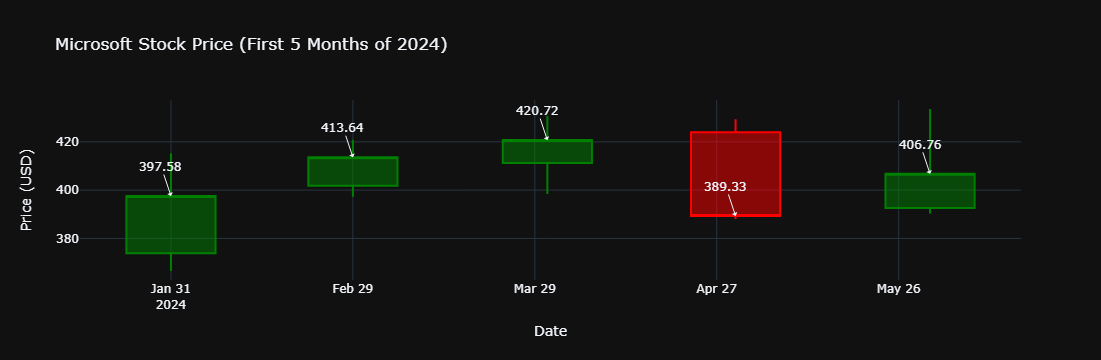

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load the data from the provided CSV file
file_path = 'C:/Users/Hari/Desktop/DataVisualization/Microsoft Dataset.csv'
data = pd.read_csv(file_path)

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for the first 5 months of 2024
start_date = '2024-01-01'
end_date = '2024-05-31'
filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Set the Date column as the index
filtered_data.set_index('Date', inplace=True)

# Resample the data to monthly frequency
monthly_data = filtered_data.resample('M').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

# Create the candlestick figure
fig = go.Figure(data=[go.Candlestick(
    x=monthly_data['Date'],
    open=monthly_data['Open'],
    high=monthly_data['High'],
    low=monthly_data['Low'],
    close=monthly_data['Close'],
    increasing_line_color='green', decreasing_line_color='red'
)])

# Update the layout for better presentation
fig.update_layout(
    title='Microsoft Stock Price (First 5 Months of 2024)',
    yaxis_title='Price (USD)',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False,
    template='plotly_dark'
)

# Add annotations for each month
for index, row in monthly_data.iterrows():
    fig.add_annotation(
        x=row['Date'], 
        y=row['Close'],
        text=f"{row['Close']:.2f}",
        showarrow=True,
        arrowhead=1
    )

# Show the plot
fig.show()
